- 회귀 모델 성능 평가
  - 설명력 (.score) : 1에 가까울수록 좋음
  - 에러율 : 낮을수록 좋음

- 설명력(결정계수)
  - 학습 완료된 모델에 .score 메서드에 독립변수와 종속변수를 전달하여 계산
  - sklearn.metrics의 r2_score() 메서드에 검증 데이터의 관측치와 추정치를 전달하여 계산

- 에러율
  - MAE : Mean Absolute Error
  - MSE : Mean Squared Error
  - RMSE : Root Mean Squared Error
  - MAPE : Mean Absolute Percentage Error
  - MPE : Mean Mercentage Error

In [54]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy.stats import t

from statsmodels.formula.api import ols, logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df1 = pd.read_excel("./data/cars.xlsx")
df1.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


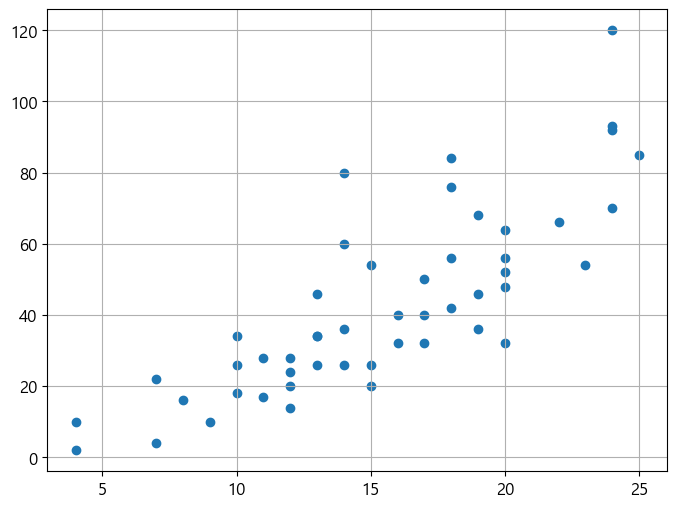

In [4]:
plt.figure()
plt.scatter(df1['speed'], df1['dist'])
plt.grid()
plt.show()

In [5]:
X = df1[['speed']]
Y = df1['dist']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [7]:
model = LinearRegression()

In [8]:
model.fit(x_train, y_train)

LinearRegression()

In [9]:
y1 = model.predict(x_train)
y2 = model.predict(x_test)

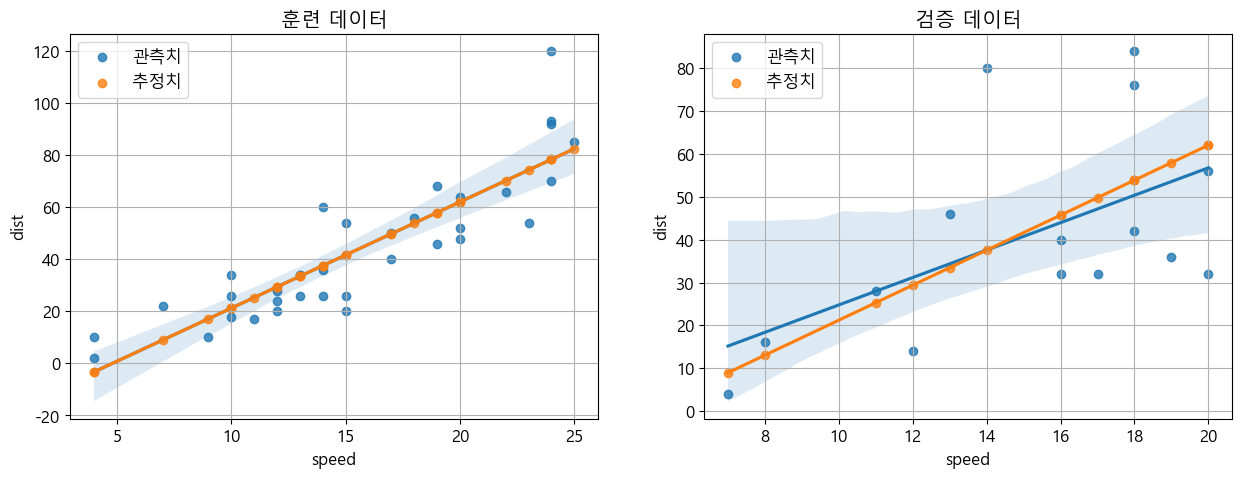

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x=x_train['speed'], y=y_train, ci=95, ax=ax1, label='관측치')
sns.regplot(x=x_train['speed'], y=y1, ci=0, ax=ax1, label='추정치')

sns.regplot(x=x_test['speed'], y=y_test, ci=95, ax=ax2, label='관측치')
sns.regplot(x=x_test['speed'], y=y2, ci=0, ax=ax2, label='추정치')

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

In [11]:
model.score(x_train, y_train)

0.7688402282174172

In [12]:
model.score(x_test, y_test)

0.28371351685031765

In [13]:
mean_absolute_error(y_test, y2)

16.03126077695506

In [14]:
mean_squared_error(y_test, y2)

382.32507324597447

In [15]:
np.sqrt(mean_squared_error(y_test, y2))

19.553134614326535

In [16]:
np.mean(np.abs((y_test - y2) / y_test) * 100)

47.61426100886607

In [17]:
np.mean((y_test - y2) / y_test * 100)

-24.500837340827605

In [18]:
observe = y_test    # 관측치
predict = y2        # 예측치

result = {
    "결정계수(R2)": r2_score(observe, predict),
    "평균절대오차(MAE)": mean_absolute_error(observe, predict),
    "평균제곱오차(MSE)": mean_squared_error(observe, predict),
    "평균오차(RMSE)": np.sqrt(mean_squared_error(observe, predict)),
    "평균 절대 백분오차 비율(MAPE)": np.mean(np.abs((observe - predict) / observe) * 100),
    "평균 비율 오차(MPE)": np.mean((observe - predict) / observe * 100)
}

result_df = pd.DataFrame(result, index=["선형회귀분석"])
result_df

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE)
선형회귀분석,0.283714,16.031261,382.325073,19.553135,47.614261,-24.500837


- 회귀분석의 결과보고



<img src = "./res/table.png">

In [19]:
model = ols("dist ~ speed", data = df1).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.49e-12
Time:                        15:11:04   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<img src = "./res/result-all.png">

- OLS 회귀 분석
  1. R-squared
  2. 보정된 R-squared
  3. F 통계량 : 도출된 회귀 방정식에 대한 유의수준
  4. F 통계량에 대한 p-value : 0.05보다 작아야 통계적으로 유의미한 모델이 됨, 높으면 의미가 없는 모델
  5. 우도 : 종속변수가 정규분포라고 가정했을 때의 우도 값
  6. 로그 우도를 독립변수의 수로 보정한 값으로 작을수록 좋음
  7. Intercept coef : 절편
  8. 각 변수별 기울기
  9. 각 변수별 p-value : 0.05 미만이어야 의미있는 변수, 현재와 같은 크기의 표본에서 해당 계수가 추정될 확률
  10. 독립변수의 개수
  11. 데이터 표본 수

- Durbin-Watson : 등분산성을 따르는지의 여부 통계량

In [21]:
df2 = pd.read_excel("./data/fish.xlsx")

In [22]:
df2.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [23]:
df2_2 = df2.copy()

In [24]:
df2_2['무게'] = df2_2['무게'] ** (1/3)

In [25]:
model = ols('무게 ~ 길이+높이+두께', data = df2_2).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     무게   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2673.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           6.32e-57
Time:                        15:11:04   Log-Likelihood:                 17.211
No. Observations:                  56   AIC:                            -26.42
Df Residuals:                      52   BIC:                            -18.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1012      0.094      1.075      0.288      -0.088       0.290
길이             0.1118      0.017      6.722      0.000       0.078       0.145
높이             0.2454      0.063      3.876      0.000       0.118       0.373
두께             0.2976      0.077      3.843      0.000       0.142       0.453
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.567
Skew:                          -0.238   Prob(JB):                        0.753
Kurtosis:                       3.124   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- sklearn 선형회귀 결과보고

In [27]:
df3 = pd.read_excel("./data/cars.xlsx")
df3.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [45]:
xnames = ['speed']
yname = 'dist'

In [28]:
x = df3[['speed']]
y = df3['dist']

In [29]:
model = LinearRegression()
model.fit(x, y)

print("계수(기울기) :", model.coef_)
print("절편 :", model.intercept_)
print("훈련 데이터 설명력 :", model.score(x, y))

expr = "y = {0:0.2f} * X + {1:0.2f}".format(model.coef_[0], model.intercept_)
print(expr)

계수(기울기) : [3.93240876]
절편 : -17.57909489051095
훈련 데이터 설명력 : 0.6510793807582509
y = 3.93 * X + -17.58


- 결과보고용 값 구하기

In [30]:
# 절편과 계수 결합
params = np.append(model.intercept_, model.coef_)
params

array([-17.57909489,   3.93240876])

In [31]:
# 독립변수에 상수항 추가
designX = X.copy()
designX.insert(0, '상수', 1)
designX.head()

,상수,speed
0,1,4
1,1,4
2,1,7
3,1,7
4,1,8


In [32]:
# 독립변수의 행렬곱 구하기
dot = np.dot(designX.T, designX)
dot

array([[   50,   770],
       [  770, 13228]], dtype=int64)

In [33]:
# 행렬곱의 역행렬
inv = np.linalg.inv(dot)
inv

array([[ 0.19310949, -0.01124088],
       [-0.01124088,  0.00072993]])

In [34]:
# 역행렬의 대각선값 반환
dia = inv.diagonal()
dia

array([0.19310949, 0.00072993])

- MSE 계산
$$MSE = \frac{\sum(y_i - \hat{y_i})^2}{n-p-1}$$

- n : 관측 갯수
- p : 독립변수 갯수

In [38]:
predictions = model.predict(X)
MSE = (sum((y - predictions)**2)) / (len(designX) - len(designX.iloc[0]))
MSE

236.53168856447687

- 표준오차

In [39]:
se_b = np.sqrt(MSE * dia)
se_b

array([6.75844017, 0.41551278])

- t-value

In [41]:
ts_b = params / se_b
ts_b

array([-2.601058  ,  9.46398999])

- p-value

In [44]:
p_values = [2*(1-t.cdf(np.abs(i), len(designX) - len(designX.iloc[0]))) for i in ts_b]
p_values

[0.01231881615380881, 1.48991929904696e-12]

In [46]:
vif = []

for i, v in enumerate(xnames):
    j = list(df3.columns).index(v)
    vif.append(variance_inflation_factor(df3, j))

vif

[9.642207177996063]

In [50]:
result_df = pd.DataFrame({
    '종속변수' : [yname] * len(xnames),
    '독립변수' : xnames,
    'B' : np.round(model.coef_, 4),
    '표준오차' : np.round(se_b[1:], 3),
    'β' : 0,
    't' : np.round(ts_b[1:], 4),
    '유의확률' : '%0.3f*' % np.round(p_values[1:], 3),
    'VIF' : vif 
})

result_df

,종속변수,독립변수,B,표준오차,β,t,유의확률,VIF
0,dist,speed,3.9324,0.416,0,9.464,0.000*,9.642207


- 잔차 계산

In [53]:
y_pred = model.predict(X)
resid = Y - y_pred

resid.head()

0     3.849460
1    11.849460
2    -5.947766
3    12.052234
4     2.119825
Name: dist, dtype: float64

- durbin_watson 계산

In [55]:
dw = durbin_watson(resid)
dw

1.6762253234350974

- 설명력($R^2$)

In [56]:
r2 = r2_score(Y, y_pred)
r2

0.6510793807582509

- 보정된 $R^2$

In [57]:
# 표본수
rowcount = len(df3)

# 독립변수의 수
featurecount = len(df3.columns)

adj_r2 = 1 - (1 - r2) * (rowcount - 1) / (rowcount - featurecount)
adj_r2

0.6438102011907145

- 통계량과 p-value

In [58]:
f, p = f_regression(X, Y)
f[0], p[0]

(89.56710653646829, 1.489836496294943e-12)

In [59]:
tpl = "𝑅^2(%.3f), Adj.𝑅^2(%.3f), 𝐹(%.3f), 유의확률(%.3f), Durbin-Watson(%.3f)"
tpl % (r2, adj_r2, f[0], p[0], dw)

'𝑅^2(0.651), Adj.𝑅^2(0.644), 𝐹(89.567), 유의확률(0.000), Durbin-Watson(1.676)'

In [60]:
tpl = "%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s) = %0.3f, p %s 0.05)."

tpl % (
    yname,
    ",".join(xnames),
    "유의하다" if p[0] <= 0.05 else "유의하지 않다",
    len(x.columns),
    len(x.index)-2,
    f[0],
    "<=" if p[0] <= 0.05 else ">")

'dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(1,48) = 89.567, p <= 0.05).'